# K Nearest Neighbors with Python

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## The Data

Let's start by reading in the Churn_Modelling.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('D:\\iAnalyst\\Machine Learning\\KNN\\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Selection

In [4]:
df=df[['CreditScore','Age','Balance','EstimatedSalary','Tenure','Exited','NumOfProducts']]#,'HasCrCard']]  
#IS IT OKAY TO INCLUDE CATEGORICAL VARIABLES IF BY INCLUDING THEM THE ACCURACY INCREASES.???
df.head()

,CreditScore,Age,Balance,EstimatedSalary,Tenure,Exited,NumOfProducts
0,619,42,0.00,101348.88,2,1,1
1,608,41,83807.86,112542.58,1,0,1
2,502,42,159660.80,113931.57,8,1,3
3,699,39,0.00,93826.63,1,0,2
4,850,43,125510.82,79084.10,2,0,1


# WITHOUT STANDARDIZING

In [5]:

from sklearn.model_selection import train_test_split

X=df.drop('Exited',axis=1)
Y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,Y,  test_size=0.2)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,p=2) #when p=2 (default), it is Euclidean  distance. The general form is the Minkowski distance
print(knn)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

pred

y_test[0:10]



KNeighborsClassifier(n_neighbors=3)


224     1
2218    0
4686    1
9906    0
7640    0
3441    0
2335    1
7684    0
1394    0
2650    0
Name: Exited, dtype: int64

In [7]:

## Predictions and Evaluations

#Let's evaluate our KNN model!  

#We cannot use RMSE in classifier!!!!!!!!!!!!!! Hence using roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

roc_auc_score(y_test, pred)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1574
           1       0.23      0.12      0.16       426

    accuracy                           0.73      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.67      0.73      0.69      2000



0.5063949985384565

ROC score for k=  1 is: 0.5041758385978727
ROC score for k=  2 is: 0.49752283288890486
ROC score for k=  3 is: 0.5063949985384565
ROC score for k=  4 is: 0.5035315663570581
ROC score for k=  5 is: 0.5070631327141162
ROC score for k=  6 is: 0.5098848065095358
ROC score for k=  7 is: 0.5077148618095699
ROC score for k=  8 is: 0.5038924781215884
ROC score for k=  9 is: 0.5062667406386647
ROC score for k=  10 is: 0.5031333703193324
ROC score for k=  11 is: 0.507095942874528
ROC score for k=  12 is: 0.5012005535968884
ROC score for k=  13 is: 0.505163126152084
ROC score for k=  14 is: 0.5009798306995722
ROC score for k=  15 is: 0.5017389385018285
ROC score for k=  16 is: 0.4992677368744444
ROC score for k=  17 is: 0.5015182156045123
ROC score for k=  18 is: 0.4983147508515728
ROC score for k=  19 is: 0.49885313575651286
ROC score for k=  20 is: 0.50107676980988
ROC score for k=  21 is: 0.5012974927071961
ROC score for k=  22 is: 0.50053838490494
ROC score for k=  23 is: 0.4995853988820683
R

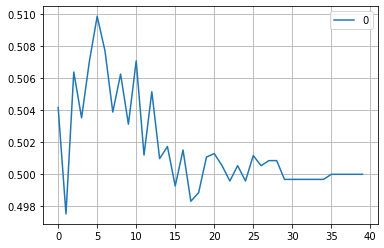

In [8]:
## Choosing a K Value


roc_val= []
for K in range(40):
    K = K+1
    knn = KNeighborsClassifier(n_neighbors=K,p=2)

    knn.fit(X_train, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    score= roc_auc_score(y_test, pred) #roc scores
    roc_val.append(score)
    print('ROC score for k= ' , K , 'is:', score)  #maximum ROC score is preferred.

curve = pd.DataFrame(roc_val) 
curve.plot()
plt.grid()

#Here we can see that that after arouns K>3 the error rate just tends to decline. So we will finalize k=3 as after 3 error declines. Let's retrain the model with that and check the classification report!


In [10]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL 
K=5
knn = KNeighborsClassifier(n_neighbors=K,p=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={} \n'.format(K))
print(roc_auc_score(y_test, pred))


WITH K=5 

0.5070631327141162



 WE GET TO KNOW THAT WITHOUT USING STANDARD SCALING THE ACCURACY IS WORSE

# USING STANDARD SCALER

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()  #Standard Scalar converts the variables/features to N(0,1) i.e. mu+-3(sigma)^sq. It's range will be from -3 to +3

In [8]:
scaler.fit(df.drop('Exited',axis=1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop('Exited',axis=1))

In [10]:
#df.drop('Exited',axis=1)

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:6])
df_feat.head()

,CreditScore,Age,Balance,EstimatedSalary,Tenure,Exited
0,-0.326221,0.293517,-1.225848,0.021886,-1.041760,-0.911583
1,-0.440036,0.198164,0.117350,0.216534,-1.387538,-0.911583
2,-1.536794,0.293517,1.333053,0.240687,1.032908,2.527057
3,0.501521,0.007457,-1.225848,-0.108918,-1.387538,0.807737
4,2.063884,0.388871,0.785728,-0.365276,-1.041760,-0.911583


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)

x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test_scaled)

In [12]:
df_feat

,CreditScore,Age,Balance,EstimatedSalary,Tenure,Exited
0,-0.326221,0.293517,-1.225848,0.021886,-1.041760,-0.911583
1,-0.440036,0.198164,0.117350,0.216534,-1.387538,-0.911583
2,-1.536794,0.293517,1.333053,0.240687,1.032908,2.527057
3,0.501521,0.007457,-1.225848,-0.108918,-1.387538,0.807737
4,2.063884,0.388871,0.785728,-0.365276,-1.041760,-0.911583
...,...,...,...,...,...,...
9995,1.246488,0.007457,-1.225848,-0.066419,-0.004426,0.807737
9996,-1.391939,-0.373958,-0.306379,0.027988,1.724464,-0.911583
9997,0.604988,-0.278604,-1.225848,-1.008643,0.687130,-0.911583
9998,1.256835,0.293517,-0.022608,-0.125231,-0.695982,0.807737


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['CreditScore'],
#                                                    test_size=0.30)

In [15]:
X=df_feat
Y=df['Exited']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2)

In [17]:
#X_train[0:5,0:3]

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will Exited or not. We'll start with k=1.

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=3,p=2) #when p=2 (default), it is Euclidean  distance. The general form is the Minkowski distance
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
pred = knn.predict(X_test)

In [22]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test[0:10]

2581    0
2544    0
2147    0
3240    1
962     0
5809    0
7874    0
587     0
8813    0
1277    0
Name: Exited, dtype: int64

## Predictions and Evaluations

Let's evaluate our KNN model!  

We cannot use RMSE in classifier!!!!!!!!!!!!!! Hence using roc curve

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

roc_auc_score(y_test, pred)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1561
           1       0.56      0.38      0.45       439

    accuracy                           0.80      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.78      0.80      0.78      2000



0.6459668251909076

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [26]:
roc_val= []
for K in range(40):
    K = K+1
    knn = KNeighborsClassifier(n_neighbors=K,p=2)

    knn.fit(X_train, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    score= roc_auc_score(y_test, pred) #roc scores
    roc_val.append(score)
    print('ROC score for k= ' , K , 'is:', score)  #maximum ROC score is preferred.

ROC score for k=  1 is: 0.6162139799993871
ROC score for k=  2 is: 0.5919005251875514
ROC score for k=  3 is: 0.6459668251909076
ROC score for k=  4 is: 0.6135048644420739
ROC score for k=  5 is: 0.6387763232201775
ROC score for k=  6 is: 0.6243960489085468
ROC score for k=  7 is: 0.640164079156081
ROC score for k=  8 is: 0.6172777802909473
ROC score for k=  9 is: 0.629913509679999
ROC score for k=  10 is: 0.6216555592685606
ROC score for k=  11 is: 0.6318353546511714
ROC score for k=  12 is: 0.625072415760588
ROC score for k=  13 is: 0.634255536795962
ROC score for k=  14 is: 0.623755433918156
ROC score for k=  15 is: 0.635679044593516
ROC score for k=  16 is: 0.6190215955836965
ROC score for k=  17 is: 0.6272080422718338
ROC score for k=  18 is: 0.6221181445805286
ROC score for k=  19 is: 0.6317638509278702
ROC score for k=  20 is: 0.6170997506125242
ROC score for k=  21 is: 0.6332231105870747
ROC score for k=  22 is: 0.6238977117349284
ROC score for k=  23 is: 0.6356432927318654
ROC

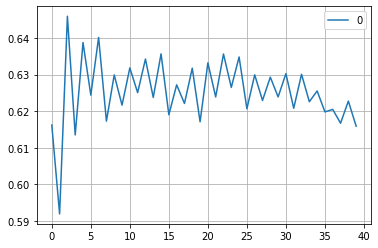

In [27]:
curve = pd.DataFrame(roc_val) 
curve.plot()
plt.grid()

Here we can see that that after arouns K>3 the error rate just tends to decline. So we will finalize k=3 as after 3 error declines. Let's retrain the model with that and check the classification report!

In [29]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL 
K=3
knn = KNeighborsClassifier(n_neighbors=K,p=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={} \n'.format(K))
print(roc_auc_score(y_test, pred))

WITH K=3 

0.6459668251909076


# using k fold

In [1]:
from sklearn.model_selection import KFold

In [14]:
kf= KFold(n_splits=2)

In [16]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

TRAIN: [5000 5001 5002 ... 9997 9998 9999] TEST: [   0    1    2 ... 4997 4998 4999]
TRAIN: [   0    1    2 ... 4997 4998 4999] TEST: [5000 5001 5002 ... 9997 9998 9999]


In [17]:
knn = KNeighborsClassifier(n_neighbors=3,p=2) #when p=2 (default), it is Euclidean  distance. The general form is the Minkowski distance
print(knn)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

pred

y_test[0:10]

KNeighborsClassifier(n_neighbors=3)


5000    0
5001    0
5002    1
5003    0
5004    1
5005    0
5006    0
5007    1
5008    0
5009    0
Name: Exited, dtype: int64

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

roc_auc_score(y_test, pred)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4009
           1       0.24      0.14      0.17       991

    accuracy                           0.74      5000
   macro avg       0.53      0.52      0.51      5000
weighted avg       0.70      0.74      0.72      5000



0.515606157588413

ROC score for k=  1 is: 0.5083322866637855
ROC score for k=  2 is: 0.5086620190343674
ROC score for k=  3 is: 0.515606157588413
ROC score for k=  4 is: 0.5094840846239251
ROC score for k=  5 is: 0.5090700313799501
ROC score for k=  6 is: 0.5075509971383761
ROC score for k=  7 is: 0.5053909984069648
ROC score for k=  8 is: 0.5005951543436954
ROC score for k=  9 is: 0.5029193900001484
ROC score for k=  10 is: 0.501967067539006
ROC score for k=  11 is: 0.5038944916823123
ROC score for k=  12 is: 0.5029478325634124
ROC score for k=  13 is: 0.5038605116288553
ROC score for k=  14 is: 0.5001586994348487
ROC score for k=  15 is: 0.5016949754072509
ROC score for k=  16 is: 0.49976755126394473
ROC score for k=  17 is: 0.5019274241433062
ROC score for k=  18 is: 0.502023826813484
ROC score for k=  19 is: 0.501660995353794
ROC score for k=  20 is: 0.5016440053270655
ROC score for k=  21 is: 0.5010204084201062
ROC score for k=  22 is: 0.5000056633422427
ROC score for k=  23 is: 0.49975622457945906

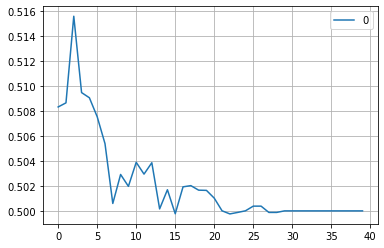

In [19]:
## Choosing a K Value

#Let's go ahead and use the elbow method to pick a good K Value:

roc_val= []
for K in range(40):
    K = K+1
    knn = KNeighborsClassifier(n_neighbors=K,p=2)

    knn.fit(X_train, y_train)  #fit the model
    pred=knn.predict(X_test) #make prediction on test set
    score= roc_auc_score(y_test, pred) #roc scores
    roc_val.append(score)
    print('ROC score for k= ' , K , 'is:', score)  #maximum ROC score is preferred.

curve = pd.DataFrame(roc_val) 
curve.plot()
plt.grid()

#Here we can see that that after arouns K>3 the error rate just tends to decline. So we will finalize k=3 as after 3 error declines. Let's retrain the model with that and check the classification report!


In [20]:

# FIRST A QUICK COMPARISON TO OUR ORIGINAL 
K=3
knn = KNeighborsClassifier(n_neighbors=K,p=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={} \n'.format(K))
print(roc_auc_score(y_test, pred))

WITH K=3 

0.515606157588413
